In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [173]:
# Data Collection & Analysis

#loading the data from csv to df
insurance_dataset = pd.read_csv('C:/Personal Stuff/projects/Medical Insurance Cost Prediction/Insurance_Dataset.csv')

In [114]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [115]:
# Getting some info about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11338 entries, 0 to 11337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       11338 non-null  int64  
 1   sex       11338 non-null  object 
 2   bmi       11338 non-null  float64
 3   children  11338 non-null  int64  
 4   smoker    11338 non-null  object 
 5   region    11338 non-null  object 
 6   charges   11338 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 620.2+ KB


In [116]:
# Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [117]:
# Statistical measures of dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,11338.000000,11338.000000,11338.000000,11338.000000
mean,40.836038,27.451641,1.926001,23724.429121
std,13.564570,5.283674,1.498843,9639.543047
min,18.000000,15.000000,0.000000,1121.873900
25%,29.000000,23.836621,1.000000,16491.430939
50%,41.000000,27.397024,2.000000,23631.636496
75%,53.000000,30.885707,3.000000,31499.795018
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\shara\AppData\Local\Temp\ipykernel_21112\3453370433.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


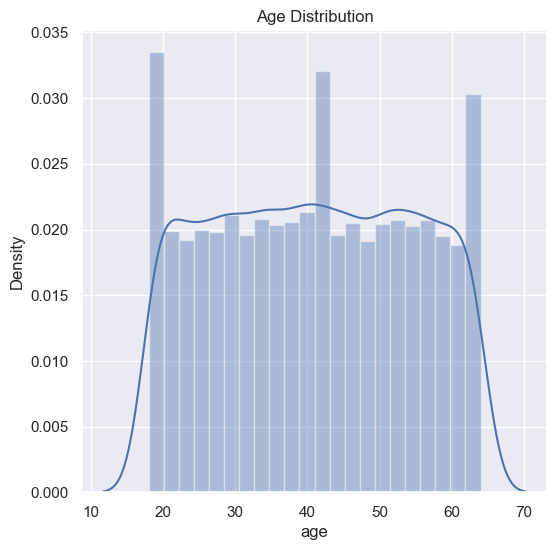

In [118]:
# Distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

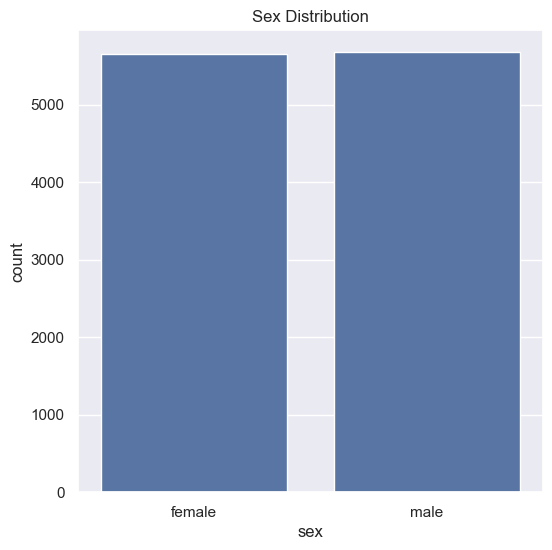

In [119]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [120]:
insurance_dataset['sex'].value_counts()

sex
male      5678
female    5660
Name: count, dtype: int64

C:\Users\shara\AppData\Local\Temp\ipykernel_21112\872932173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


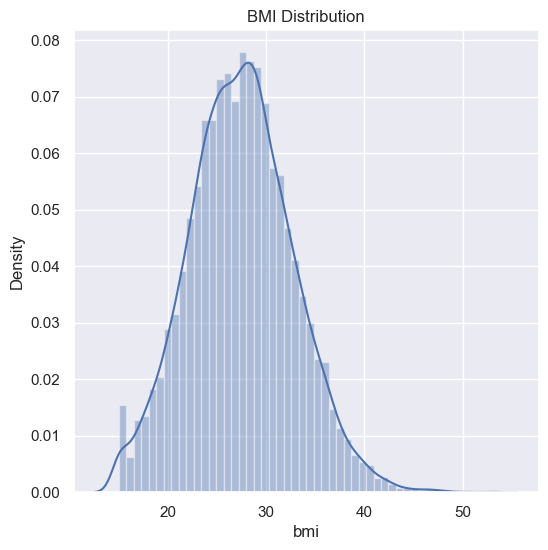

In [121]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

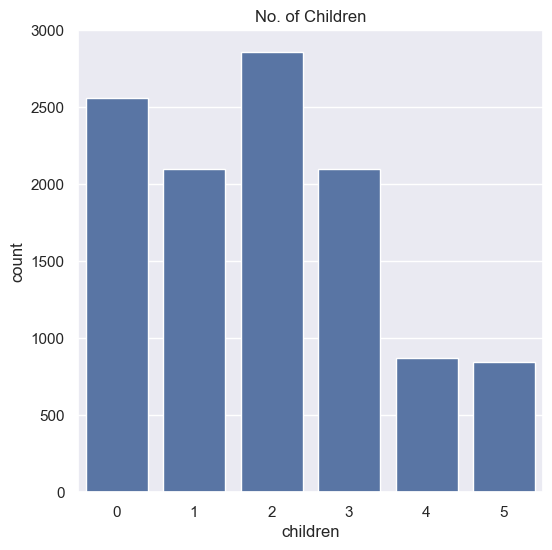

In [122]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('No. of Children')
plt.show()

In [123]:
insurance_dataset['children'].value_counts()

children
2    2858
0    2559
1    2102
3    2101
4     874
5     844
Name: count, dtype: int64

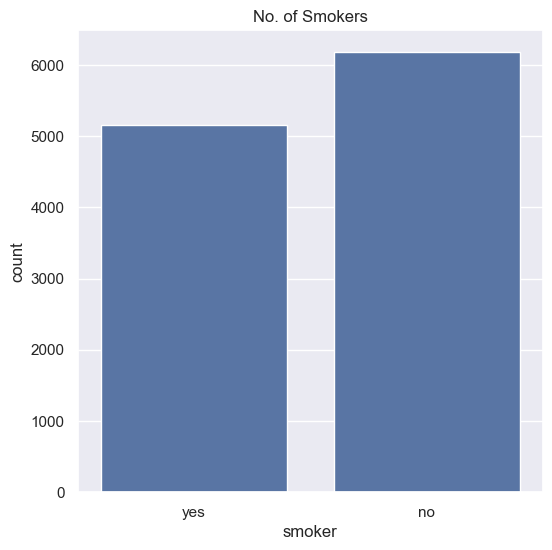

In [124]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('No. of Smokers')
plt.show()

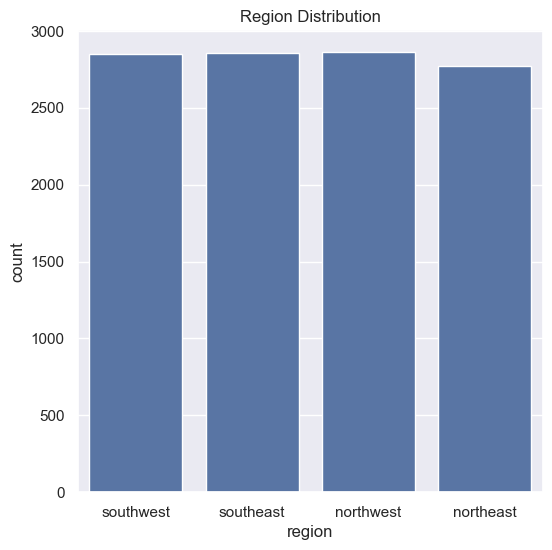

In [125]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

C:\Users\shara\AppData\Local\Temp\ipykernel_21112\3649969176.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


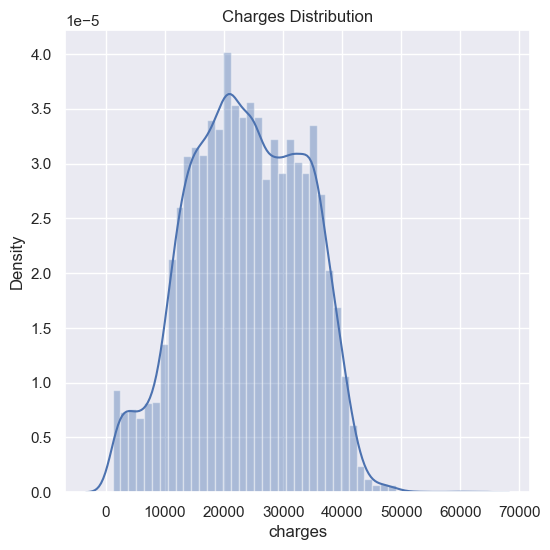

In [126]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

In [127]:
# Encoding Categorical Features

insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


C:\Users\shara\AppData\Local\Temp\ipykernel_21112\3951071407.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
C:\Users\shara\AppData\Local\Temp\ipykernel_21112\3951071407.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
C:\Users\shara\AppData\Local\Temp\ipykernel_21112\3951071407.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

In [128]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [129]:
print(X)

       age  sex        bmi  children  smoker  region
0       19    1  27.900000         0       0       1
1       18    0  33.770000         1       1       0
2       28    0  33.000000         3       1       0
3       33    0  22.705000         0       1       3
4       32    0  28.880000         0       1       3
...    ...  ...        ...       ...     ...     ...
11333   33    0  34.126200         0       1       2
11334   29    0  23.809358         0       1       0
11335   18    1  23.699451         0       1       2
11336   25    1  34.914243         1       0       2
11337   30    1  25.312487         1       1       1

[11338 rows x 6 columns]


In [130]:
print(Y)

0        16884.924000
1         1725.552300
2         4449.462000
3        21984.470610
4         3866.855200
             ...     
11333    18921.496369
11334    14520.723854
11335     9376.531008
11336    28601.899815
11337    14231.381143
Name: charges, Length: 11338, dtype: float64


In [131]:
# Splitting data into training & testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [132]:
print(X.shape, X_train.shape, X_test.shape)

(11338, 6) (9070, 6) (2268, 6)


In [133]:
# Loading the Linear Regression Model

regressor = LinearRegression()

regressor.fit(X_train, Y_train)

LinearRegression()

In [134]:
# Model Evaluation

# prediction on training data
train_prediction = regressor.predict(X_train)
test_prediction = regressor.predict(X_test)

In [135]:
r2_train = metrics.r2_score(Y_train, train_prediction)
print('R squared value:', r2_train)

R squared value: 0.831609227513816


In [136]:
r2_test = metrics.r2_score(Y_test, test_prediction)
print('R squared value:', r2_test)

R squared value: 0.8249409531491547


In [171]:
# Building a predictive system

input_data = (32,1,27.36826536,1,1,0)

#changing input data to numpy array
input_data_np = np.asarray(input_data)

input_data_reshaped = input_data_np.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD', prediction[0])

[14000.22126537]
The insurance cost is USD 14000.221265371261


C:\Users\shara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
